In [1]:
import numpy as np
import pandas as pd
import sys
import gc
import joblib
import pathlib
import json
import glob
from tqdm.notebook import tqdm

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import plotly.graph_objects as go

In [2]:
df = pd.read_csv("/Users/sandeep/Workspace/APEX/PD/PD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-11,36.750000,39.610001,36.000000,38.250000,38.250000,9287900
1,2019-04-12,39.119999,40.880001,37.398998,39.500000,39.500000,1504700
2,2019-04-15,38.500000,39.860001,36.250000,39.169998,39.169998,961200
3,2019-04-16,39.639999,39.700001,37.900002,38.049999,38.049999,727600
4,2019-04-17,38.209999,41.950001,37.500000,40.000000,40.000000,1143200


In [3]:
# Add day of the week so we can start to see weekly patterns
df['dayofweek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['dayofweek'].value_counts()

1    146
2    144
3    143
4    139
0    134
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='intraday'>

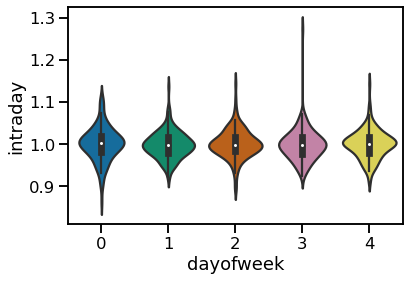

In [4]:
df['intraday'] = df['Close'] / df['Open']
sns.violinplot(x='dayofweek', y='intraday', data=df)

In [5]:
import plotly.express as px
# plotting violins to see the spread of intraday changes on each day
fig = px.violin(df, y="intraday", x='dayofweek')
fig.show()

In [6]:
# plotting violins to see the spread of intraday changes on each day with a different library
fig = go.Figure(data=go.Violin(y=df['intraday'], x=df['dayofweek'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               ))
fig.show()
                            

In [7]:
def backtest(df, day=1):
    """
    Every time buy LOVE with 1000 USD
    """
    
    usd = 1000
    profits = []
    for i in range(len(df)):
        if df['dayofweek'].values[i] == day:
            # buy
            pos_volume = usd / df['Open'].values[i]
            profits.append(pos_volume * (df['Close'].values[i] - df['Open'].values[i]))
    return profits

def plot_profits(profits, day):
    plt.figure()
    profits = np.array(profits)
    plt.plot(np.cumsum(profits))
    winp = np.sum(profits > 0) / len(profits)
    plt.xlabel('week')
    plt.ylabel('profits (USD)')
    plt.title(f'P(win) = {winp:.3f}')

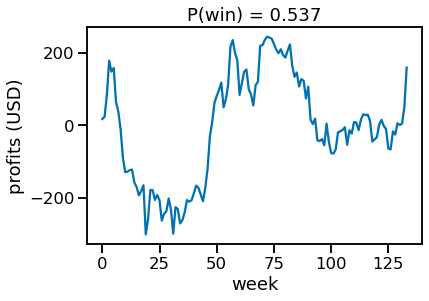

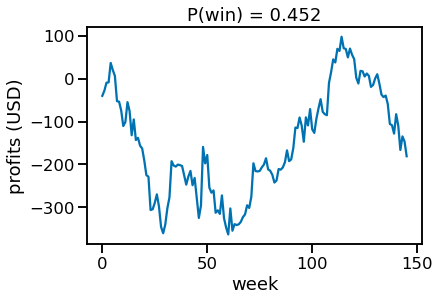

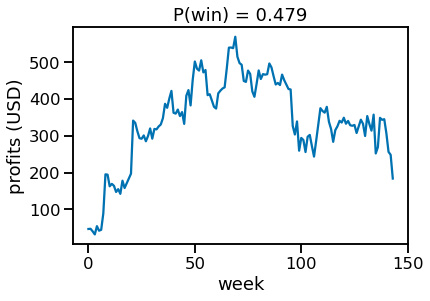

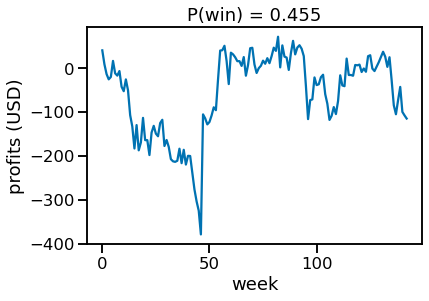

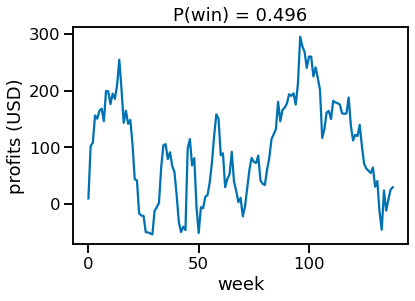

In [8]:
for i in range(0,5):
    profits = backtest(df, day=i)
    plot_profits(profits, day = i)